## To develop a machine learning model that can accurately predict the price of a diamond based on its physical characteristics

In [1]:
# Importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading dataset

data = pd.read_csv("Diamond Price prediction.csv")

In [3]:
data.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
data.tail()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,53940,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64


# Perform Domain Analysis

carat: Weight of the diamond (numeric) — heavily affects price.

cut: Quality of the diamond cut (categorical: Ideal, Premium, Good, etc.) — affects sparkle and price.

color: Color grade of the diamond (categorical: D to J) — lower letter = better color = higher price.

clarity: Internal purity or flaw grade (categorical: SI2, VS1, etc.) — fewer flaws = higher price.

depth: Depth percentage (z / mean(x,y) * 100) — ideal range improves brilliance, extreme values reduce value.

table: Width of the diamond’s top surface (as %) — affects light reflection, small impact on price.

price: Final selling price in USD — 🎯 target variable for prediction.

x: Length of the diamond in mm — used to compute size/volume, helps determine physical appeal.

y: Width of the diamond in mm — helps measure face-up size, used in volume.

z: Depth of the diamond in mm — used for 3D volume, impacts brilliance.



# Exploratory Data Analysis

In [5]:
data.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [6]:
data.head(1)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43


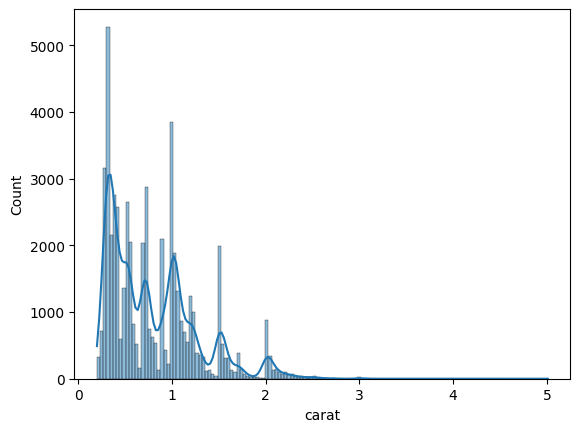

In [7]:
sns.histplot(x='carat', data = data, kde=True)
plt.show()

Insights

Most diamonds are small (0.2 to 1.0 carat).

Fewer diamonds have high carat values (above 2.0).

The graph is right-skewed — large diamonds are rare but important.

Spikes show popular sizes like 0.3, 0.5, 1.0 carat.



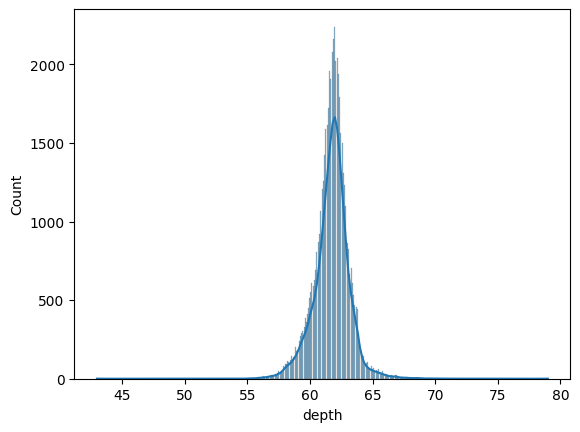

In [8]:
sns.histplot(x='depth', data = data, kde=True)
plt.show()

Insights

Most diamonds have a depth between 60% and 63%.

The distribution is almost symmetric (bell-shaped).

Very few diamonds have depth below 55% or above 65% — these could be outliers.

Ideal depth improves brilliance; too shallow or too deep can reduce value.

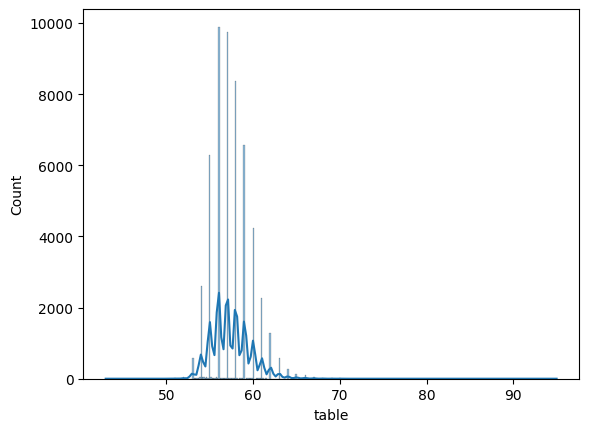

In [9]:
sns.histplot(x='table', data = data, kde=True)
plt.show()

Insights

Most diamonds have a table width between 54% and 60%.

The distribution is slightly right-skewed.

Few diamonds have very large table values (above 65%) — possible outliers.

Ideal table size ensures better light reflection and beauty.

In [10]:
data.head(1)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43


<Axes: xlabel='carat', ylabel='price'>

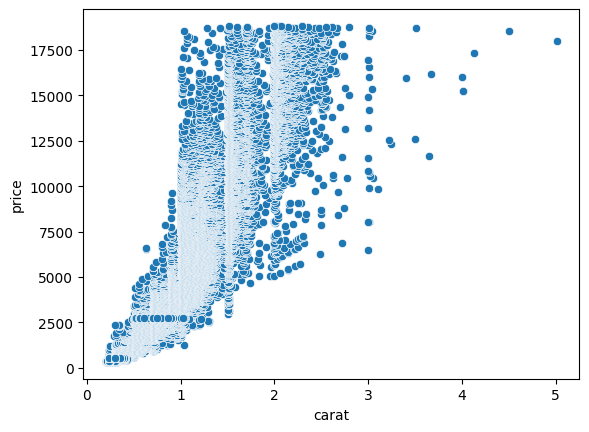

In [11]:
sns.scatterplot(x='carat', y='price', data=data)

Insights

As carat increases, price also increases — strong positive correlation.

The relationship is not perfectly linear — price jumps more sharply after ~1 carat.

Some vertical clusters show popular carat values (e.g., 0.5, 1.0, 1.5 carat).

There are a few very high-price diamonds — possible outliers.

<Axes: xlabel='depth', ylabel='price'>

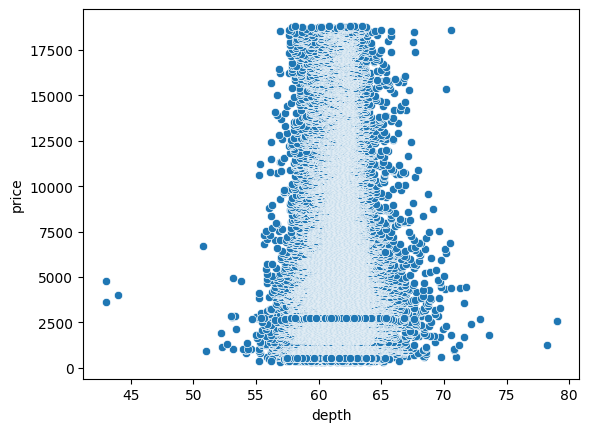

In [12]:
sns.scatterplot(x='depth', y='price', data=data)

Insights

There's no clear relationship between depth and price.

Most diamonds have depth between 60% to 63% — forming a dense vertical band.

Prices are spread widely at each depth level.

A few points at very low or high depth look like outliers.



<Axes: xlabel='table', ylabel='price'>

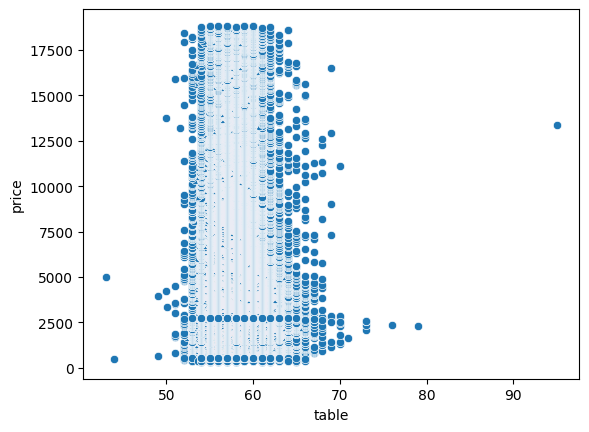

In [14]:
sns.scatterplot(x='table', y='price', data=data)

Insights

There is no clear pattern between table and price.

Most diamonds have a table size between 54% and 62% — forming a dense vertical line.

Price values are spread out across all table sizes.

A few extreme table values (above 70%) appear to be outliers.



# Feature Engineering and Data Preprocessing

In [15]:
data.isnull().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

There is no null values in any column

In [27]:
data.loc[data['x']==0] 

,carat,cut,color,clarity,depth,table,price,x,y,z


In [28]:
data.loc[data['y']==0] 

,carat,cut,color,clarity,depth,table,price,x,y,z


In [29]:
data.loc[data['z']==0] 

,carat,cut,color,clarity,depth,table,price,x,y,z


In [19]:
data['x'].replace(0, np.median(data['x']), inplace=True)
data['y'].replace(0, np.median(data['y']), inplace=True)
data['z'].replace(0, np.median(data['z']), inplace=True)

C:\Users\adity\AppData\Local\Temp\ipykernel_24504\3400879948.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['x'].replace(0, np.median(data['x']), inplace=True)
C:\Users\adity\AppData\Local\Temp\ipykernel_24504\3400879948.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.


Its all done with handling categorical data with median

In [20]:
# Using Label Encoding for converting categoorical data into numeric values

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in ['cut', 'color', 'clarity']:
    data[col] = le.fit_transform(data[col])

In [21]:
data.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75


In [22]:
# removing unnamed column

data = data.drop(columns=['Unnamed: 0'])


In [23]:
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75


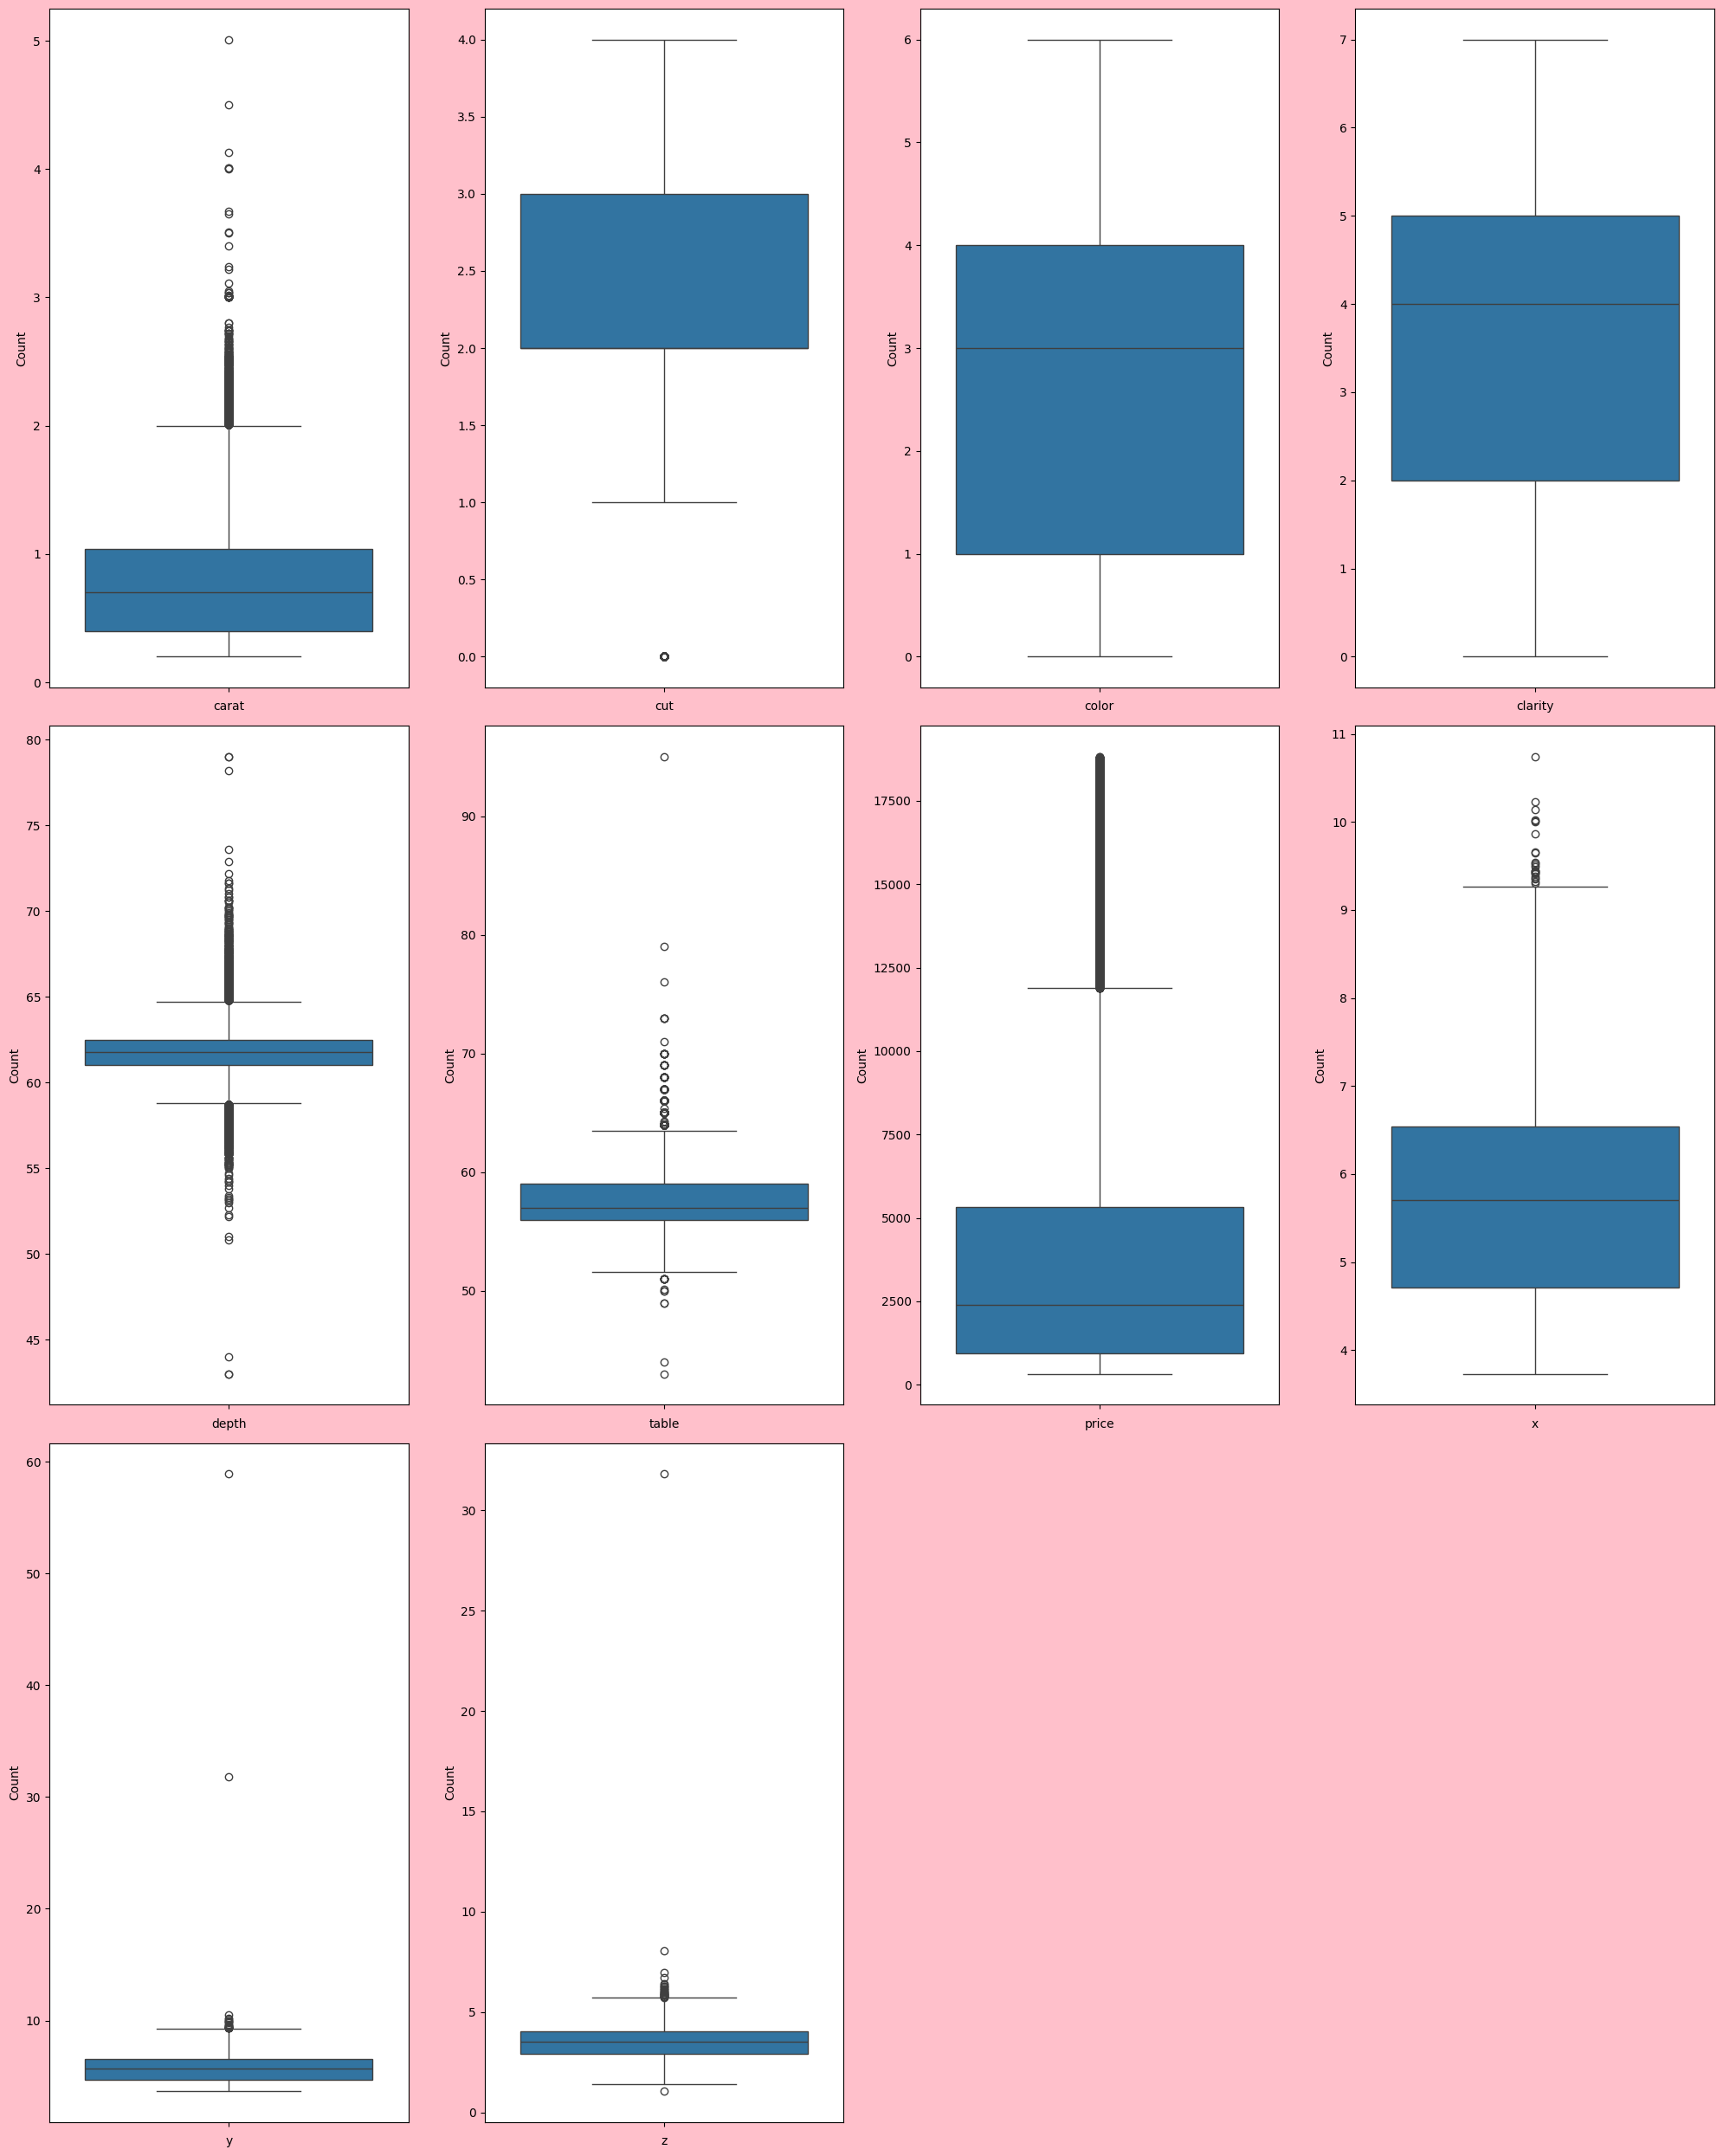

In [26]:
# Checking for outliers

plt.figure(figsize=(20, 25), facecolor='pink')
plotnumber = 1

for column in data:
    if plotnumber<=10:
        ax=plt.subplot(3, 4, plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column, fontsize=10)
        plt.ylabel('Count', fontsize=10)
    plotnumber+=1
plt.tight_layout()